#### Author: Shawn Higdon
#### Date: April 17, 2018

#### This workbook documents comparison of Meyerozyma isolate genomes with a Minhash approach using Sourmash


In [1]:
ls

jupyter-log-18959083.txt  meyerozyma_comparison.ipynb  README.md


In [2]:
!. ~/py3/bin/activate

In [4]:
!sourmash compute -h

usage: sourmash [-h] [--protein] [--no-protein] [--dna] [--no-dna] [-q]
                [--input-is-protein] [-k KSIZES] [-n NUM_HASHES]
                [--check-sequence] [-f] [-o OUTPUT] [--singleton]
                [--merge MERGED] [--name-from-first] [--track-abundance]
                [--scaled SCALED] [--seed SEED] [--randomize]
                [--license LICENSE]
                filenames [filenames ...]

positional arguments:
  filenames             file(s) of sequences

optional arguments:
  -h, --help            show this help message and exit
  --protein             build protein signatures (default: False)
  --no-protein          do not build protein signatures
  --dna                 build DNA signatures (default: True)
  --no-dna              do not build DNA signatures
  -q, --quiet           suppress non-error output
  --input-is-protein    Consume protein sequences - no translation needed.
  -k KSIZES, --ksizes KSIZES
                        comma-separated list of k-

In [13]:
!for i in ../meyerozyma_assemblies/*; do bname=`basename $i`; newname=$(echo $bname | cut -d. -f1); echo $newname; sourmash compute -k 31 --scaled 1000 $i -o ${newname}.sig; done

001
setting num_hashes to 0 because --scaled is set
computing signatures for files: ../meyerozyma_assemblies/001.fa
Computing signature for ksizes: [31]
Computing only DNA (and not protein) signatures.
Computing a total of 1 signature(s).
... reading sequences from ../meyerozyma_assemblies/001.fa
calculated 1 signatures for 212 sequences in ../meyerozyma_assemblies/001.fa
saved 1 signature(s). Note: signature license is CC0.
008
setting num_hashes to 0 because --scaled is set
computing signatures for files: ../meyerozyma_assemblies/008.fa
Computing signature for ksizes: [31]
Computing only DNA (and not protein) signatures.
Computing a total of 1 signature(s).
... reading sequences from ../meyerozyma_assemblies/008.fa
calculated 1 signatures for 123 sequences in ../meyerozyma_assemblies/008.fa
saved 1 signature(s). Note: signature license is CC0.
016
setting num_hashes to 0 because --scaled is set
computing signatures for files: ../meyerozyma_assemblies/016.fa
Computing signature for ks

In [15]:
!mkdir k31_sigs

In [16]:
!mv *.sig k31_sigs/

In [21]:
!sourmash compare k31_sigs/* -o k31_sigs/meyero_k31_cmp

loaded 16 signatures total.                                                    
downsampling to scaled value of 1000

0-../meyerozyma_a...	[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1-../meyerozyma_a...	[ 0.997  1.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.   ]
2-../meyerozyma_a...	[ 0.961  0.96   1.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.   ]
3-../meyerozyma_a...	[ 0.992  0.992  0.956  1.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.   ]
4-../meyerozyma_a...	[ 0.997  0.996  0.96   0.991  1.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.   ]
5-../meyerozyma_a...	[ 0.996  0.996  0.96   0.991  0.996  1.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.   ]
6-../meyerozyma_a...	[ 0.99   0.99   0.954  0.985  0.991  0.989  1.     0.     0.     0.     0.
  0.     0.     0.     0.     0.  

In [22]:
ls k31_sigs/

001.sig  025.sig  068.sig  084.sig  132.sig  425.sig
008.sig  049.sig  071.sig  094.sig  135.sig  meyero_k31_cmp
016.sig  053.sig  081.sig  127.sig  344.sig  meyero_k31_cmp.labels.txt


In [24]:
!head k31_sigs/meyero_k31_cmp.labels.txt

../meyerozyma_assemblies/001.fa
../meyerozyma_assemblies/008.fa
../meyerozyma_assemblies/016.fa
../meyerozyma_assemblies/025.fa
../meyerozyma_assemblies/049.fa
../meyerozyma_assemblies/053.fa
../meyerozyma_assemblies/068.fa
../meyerozyma_assemblies/071.fa
../meyerozyma_assemblies/081.fa
../meyerozyma_assemblies/084.fa


In [27]:
cd k31_sigs/

/home/smhigdon/Projects/mucilage_genomes/meyerozyma/k31_sigs


In [35]:
!head -n5 meyero_k31_cmp.labels.txt

../meyerozyma_assemblies/001.fa
../meyerozyma_assemblies/008.fa
../meyerozyma_assemblies/016.fa
../meyerozyma_assemblies/025.fa
../meyerozyma_assemblies/049.fa


In [43]:
# remove file path prefixes
for line in fileinput.input(['meyero_k31_cmp.labels.txt'], inplace=True):
    print(line.replace('../meyerozyma_assemblies/', ''), end='')


In [44]:
!head -n5 meyero_k31_cmp.labels.txt

001.fa
008.fa
016.fa
025.fa
049.fa


In [45]:
%matplotlib inline

In [46]:
import sys
sys.path.insert(0, '../../')
from sourmash_lib import fig

In [47]:
mat, labels = fig.load_matrix_and_labels('meyero_k31_cmp')

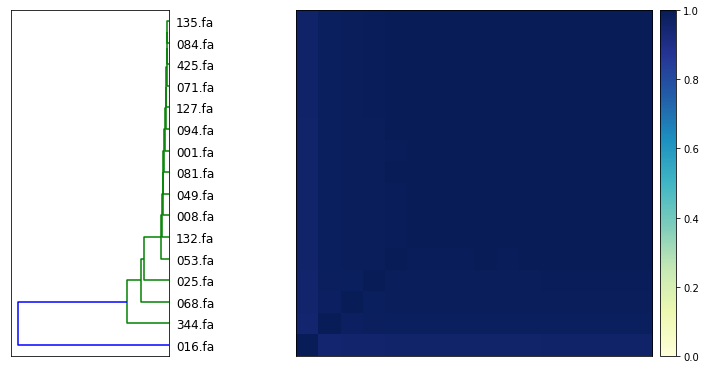

In [48]:
k31_plot = fig.plot_composite_matrix(mat, labels, vmax=1.0)


In [49]:
!sourmash lca -h

usage: 
sourmash lca <command> [<args>] - work with taxonomic information.

** Commands can be:

index <taxonomy.csv> <output_db name> <signature [...]>  - create LCA database
classify --db <db_name [...]> --query <signature [...]>  - classify genomes
gather <signature> <db_name [...]>                       - classify metagenomes
summarize --db <db_name [...]> --query <signature [...]> - summarize mixture
rankinfo <db_name [...]>                                 - database rank info
compare_csv <csv1> <csv2>                                - compare spreadsheets

** Use '-h' to get subcommand-specific help, e.g.

sourmash lca index -h

lowest-common ancestor (LCA) utilities

positional arguments:
  lca_command

optional arguments:
  -h, --help   show this help message and exit


In [50]:
ls

001.sig  025.sig  068.sig  084.sig  132.sig  425.sig
008.sig  049.sig  071.sig  094.sig  135.sig  meyero_k31_cmp
016.sig  053.sig  081.sig  127.sig  344.sig  meyero_k31_cmp.labels.txt


In [52]:
!for i in *.sig; do sourmash lca gather $i /home/smhigdon/mnt/genbank-k31.lca.json.gz; done

loaded 1 LCA databases. ksize=31, scaled=10000k-k31.lca.json.gz
loaded query: ../meyerozyma_assemblies/001.f... (k=31)

overlap     p_query p_match 
---------   ------- --------
8.7 Mbp      80.5%   97.7%      Meyerozyma caribbica
220.0 kbp     2.0%    2.4%      Meyerozyma guilliermondii
30.0 kbp      0.3%    0.0%      Escherichia coli (** 3 equal matches)
10.0 kbp      0.1%    0.0%      Stagonosporopsis tanaceti (** 32 equal matches)
10.0 kbp      0.1%    0.2%      Enterobacter cloacae complex sp. 35734 (** 31 equal matches)
10.0 kbp      0.1%    0.1%      Meyerozyma [Candida] carpophila

17.0% (1.8 Mbp) of hashes have no assignment.
loaded 1 LCA databases. ksize=31, scaled=10000k-k31.lca.json.gz
loaded query: ../meyerozyma_assemblies/008.f... (k=31)

overlap     p_query p_match 
---------   ------- --------
8.7 Mbp      80.5%   97.7%      Meyerozyma caribbica
220.0 kbp     2.0%    2.4%      Meyerozyma guilliermondii
10.0 kbp      0.1%    0.0%      Stagonosporopsis tanaceti (** 4 equa

loaded 1 LCA databases. ksize=31, scaled=10000k-k31.lca.json.gz
loaded query: ../meyerozyma_assemblies/344.f... (k=31)

overlap     p_query p_match 
---------   ------- --------
8.7 Mbp      80.1%   97.7%      Meyerozyma caribbica
220.0 kbp     2.0%    2.4%      Meyerozyma guilliermondii
60.0 kbp      0.6%    1.2%      Rahnella sp. WP5
10.0 kbp      0.1%    0.0%      Stagonosporopsis tanaceti (** 62 equal matches)
10.0 kbp      0.1%    0.2%      Pseudomonas sp. 25 E 4 (** 61 equal matches)
10.0 kbp      0.1%    0.1%      Meyerozyma [Candida] carpophila

17.1% (1.9 Mbp) of hashes have no assignment.
loaded 1 LCA databases. ksize=31, scaled=10000k-k31.lca.json.gz
loaded query: ../meyerozyma_assemblies/425.f... (k=31)

overlap     p_query p_match 
---------   ------- --------
8.7 Mbp      80.7%   97.7%      Meyerozyma caribbica
220.0 kbp     2.0%    2.4%      Meyerozyma guilliermondii
10.0 kbp      0.1%    0.0%      Stagonosporopsis tanaceti (** 38 equal matches)
10.0 kbp      0.1%    0.5